# K-Neaest Neighbour

K-Nearest Neighbors, commonly known as KNN, is a simple yet effective algorithm used in machine learning for classification and regression problems. However, it is more widely used in classification problems.

## 1.Basic Concept
The fundamental idea behind KNN is to find the 'k' nearest data points in the training set to a new, unseen data point and then classify or predict the new data point based on the majority class or average value of these 'k' nearest neighbors.

## 2.Classification:  
 If KNN is used for classification, the new data point is assigned the class that has the majority among its 'k' nearest neighbors.
Regression: If KNN is used for regression, the new data point is predicted to have the average value of its 'k' nearest neighbors.
Key Considerations
When using KNN, there are a few key considerations to keep in mind:

## 3.Distance Metric:
 Choosing an appropriate distance metric is crucial for KNN. The most common distance metrics used are Euclidean and Manhattan distances.
Value of 'k': The value of 'k' is a hyperparameter that determines the number of nearest neighbors to consider for classification or regression. A small value of 'k' might lead to overfitting, while a large value might lead to underfitting. Cross-validation can be used to find the optimal value of 'k'.
## 4.Curse of Dimensionality:
 KNN can suffer from the curse of dimensionality, meaning that as the number of features (dimensions) increases, the performance of KNN degrades. This is because the volume of the feature space increases so rapidly that the available data become sparse.
## 5.Handling Categorical Variables:
 KNN can handle categorical variables by using techniques such as one-hot encoding or feature hashing.
Strengths and Weaknesses
Some of the strengths of KNN include:

Easy to Implement: KNN is a simple algorithm to understand and implement.
Non-Parametric: KNN is a non-parametric algorithm, meaning it does not make any assumptions about the underlying data distribution.
Lazy Learning: KNN is a lazy learning algorithm, as it does not have a training phase; instead, it stores the dataset and performs computation during the prediction phase.

In [1]:
# Examples of KNN classifire on IRIS dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# load the dataset
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# split the data into X and y
X = df.drop('species', axis=1)  # drop 'species'
y = df['species']

In [5]:
# load the fit the KNN classifier on the data
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
# make predictions for a new dataset
df2 = np.array([[5.4,3.5,1.4,0.2]])
knn.predict(df2)



c:\Users\Vikas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(50.722222222222214, 0.5, 'True')

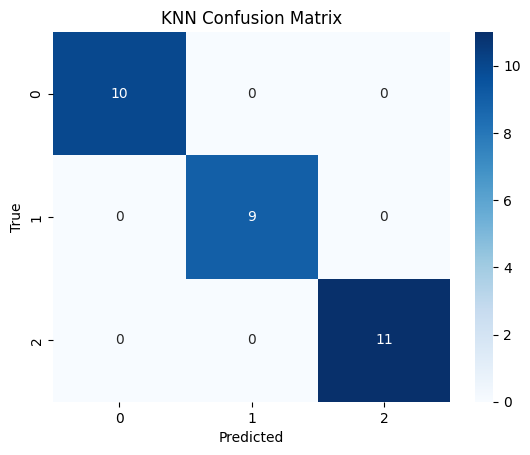

In [6]:
# train test split the data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

model = KNeighborsClassifier(n_neighbors=1)
# fit model on training data
model.fit(X_train, y_train)

# predict the  labels for the test data
y_pred = model.predict(X_test)

# evaluate the model
from  sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


# plot the confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')


# Regression problem using on tips dataset

# KNN  algorithm implementation in Python

In [7]:
# load the dataset
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
# split the dataset
X = tips.drop('tip',axis=1)
y = tips['tip']

In [9]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [10]:
# encode the catagorical columns using for loop and le
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object'or  X[col].dtype == 'category':
        X[col] = le.fit_transform(X[col])

In [11]:
# train test split the data
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = KNeighborsRegressor(n_neighbors=5,metric='minkowski',p=2)
model.fit(X_train, y_train)
# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
print()


0.8382265306122448
0.3294034029001649



In [12]:
X_test.head()

,total_bill,sex,smoker,day,time,size
24,19.82,1,0,1,0,2
6,8.77,1,0,2,0,2
153,24.55,1,0,2,0,4
211,25.89,1,1,1,0,4
198,13.00,0,1,3,1,2


In [13]:
model.predict([[20,1,0,1,1,4]])

c:\Users\Vikas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([3.13])